# Viz Playground

In [18]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams.update({'font.size': 16})

In [51]:
import json
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

def deep_access(data, keylist):
     val = data
     for key in keylist:
         val = val[key]
     return val

class ProfilingVisualizer(object):
    def __init__(self, json_path):
        self._data_path = json_path
        self.data = self.read_profiling_data()
        self.accuracy_data = self.read_accuracy_data()

    def read_accuracy_data(self):
         data = self.read_data()
         return data["results"]
                 
    def read_profiling_data(self):
         data = self.read_data()
         return {k:v for k,v in data["profile"].items() if k not in ["time","subprofile"]}

    def read_data(self):
        with open(self._data_path) as json_file:
            data = json.load(json_file)
        return data

    def plot_total_time_taken(self):
        keys = self.data.keys()
        x_vals = list(map(int, keys))
        total_time = [self.data[x]["time"] for x in keys]
        plt.plot(x_vals, total_time, label="Total time")
        plt.xticks(np.arange(0, 10, 1.0))
        plt.xlabel("Task Id")
        plt.ylabel("Time, seconds")
        plt.title("iCaRL: Total time taken across different Tasks")

    def plot_total_time_breakdown(self):
        keys = self.data.keys()
        x_vals = list(map(int, keys))
        total_time = [self.data[x]["time"] for x in keys]
        plt.plot(x_vals, total_time, label="Total time")
        
        breakdown_data = defaultdict(list)
        for task_id in keys:
            for subprofile_id, subprofile_data in self.data[task_id]["subprofile"].items():
                breakdown_data[subprofile_id].append(subprofile_data["time"])
        
        for subprofile_id, subprofile_data in breakdown_data.items():
            plt.plot(x_vals, subprofile_data, label=subprofile_id)
            
        plt.xticks(np.arange(0, 10, 1.0))
        plt.xlabel("Task Id")
        plt.ylabel("Time, seconds")
        plt.title("iCaRL: Total Time breakdown across different Tasks")
        plt.legend()
        print("Before Task = Compute predictions for previous task (used in distillation loss term), add a new layer and setup optimizer")
        print("Train Task = Forward + Loss Compute + Backward + Optimizer Update + Validation (every epoch) ")
        print("After Task = Exemplar reduction and building new exemplars ")
        print("Eval Task = Evaluation on test set")
    
    def plot_subprofile_breakdown(self, subprof_tree_root=["train_task"]):
        subprof_root_name = ".".join(subprof_tree_root)
        keys = self.data.keys()
        x_vals = list(map(int, keys))
        total_time = [deep_access(self.data[x]["subprofile"], subprof_tree_root)["time"] for x in keys]
        plt.plot(x_vals, total_time, label="Total {} time".format(subprof_root_name))
        
        breakdown_data = defaultdict(list)
        for task_id in keys:
            subprofile_root = deep_access(self.data[task_id]["subprofile"], subprof_tree_root)["subprofile"]
            if "subprofile" in subprofile_root:
                subprofile_root = subprofile_root["subprofile"]
            for subprofile_id, subprofile_data in subprofile_root.items():
                breakdown_data[subprofile_id].append(subprofile_data["time"])
        
        for subprofile_id, subprofile_data in breakdown_data.items():
            plt.plot(x_vals, subprofile_data, label=subprofile_id)
            
        plt.xticks(np.arange(0, 10, 1.0))
        plt.xlabel("Task Id")
        plt.ylabel("Time, seconds")
        plt.title("iCaRL: Time breakdown for {} task.".format(subprof_root_name))
        plt.legend()
        
    def plot_taskwise_accuracy(self):
        x_vals = []
        plot_dict = defaultdict(list)
        for result_dict, task_id in zip(reversed(self.accuracy_data), reversed(range(0,len(self.accuracy_data)))):
            for classrange, score in result_dict.items():
                 plot_dict[classrange].append(score)
            x_vals.append(task_id)
        for classrange, scorelist in plot_dict.items():
            scorelist += [0] * (10 - len(scorelist))
            plt.plot(x_vals, scorelist, label="Class " + classrange)
        plt.title("iCaRL: Task-wise accuracy, CIFAR-100, ResNet18")
        plt.xlabel("Task Id")
        plt.ylabel("Accuracy")
        plt.legend()

In [52]:
prof = ProfilingVisualizer("results/exp/20190531-11-54-58_1_.json")

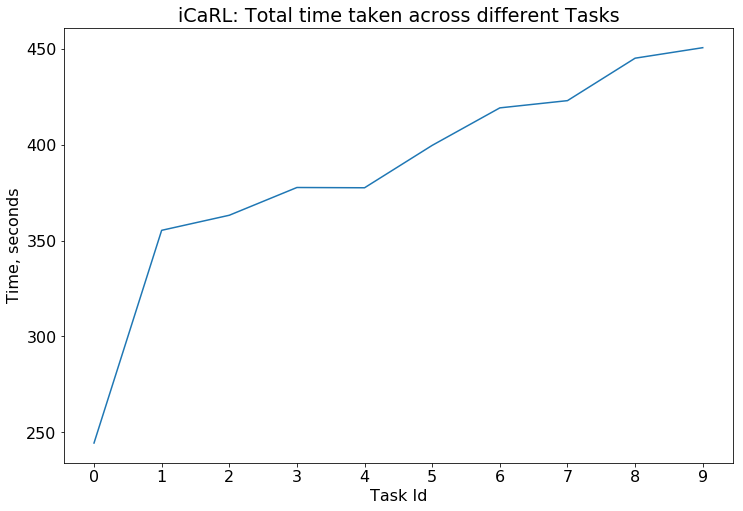

In [37]:
prof.plot_total_time_taken()

Before Task = Compute predictions for previous task (used in distillation loss term), add a new layer and setup optimizer
Train Task = Forward + Loss Compute + Backward + Optimizer Update + Validation (every epoch) 
After Task = Exemplar reduction and building new exemplars 
Eval Task = Evaluation on test set


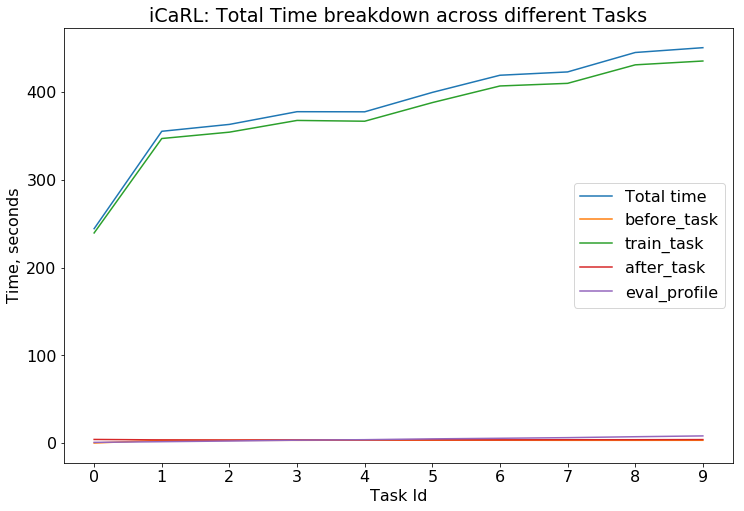

In [54]:
prof.plot_total_time_breakdown()
#plt.yscale('log')
#plt.ylabel("Time, seconds, LOG SCALE")
#plt.ylim(0,20)

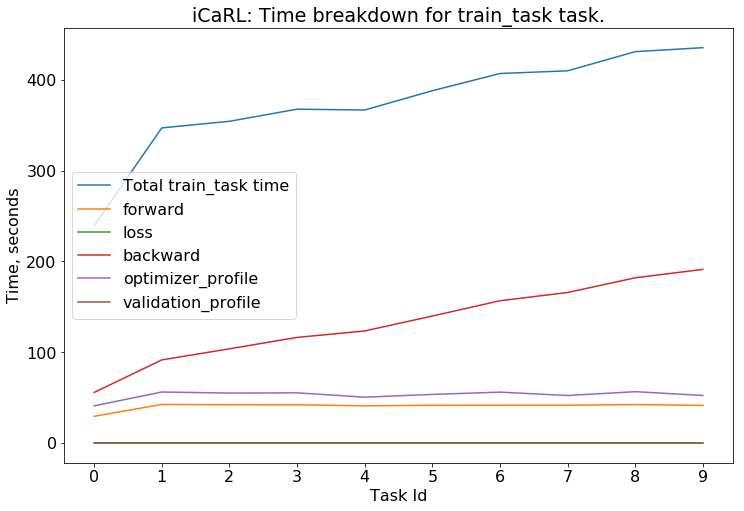

In [33]:
prof.plot_subprofile_breakdown(["train_task"])

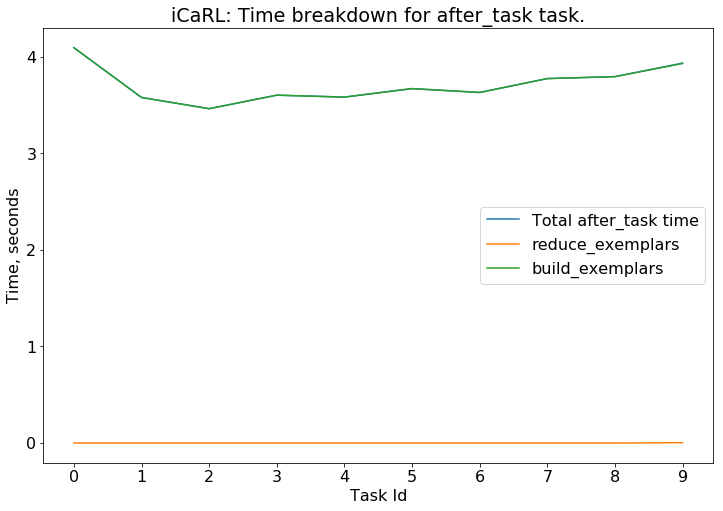

In [24]:
prof.plot_subprofile_breakdown(["after_task"])

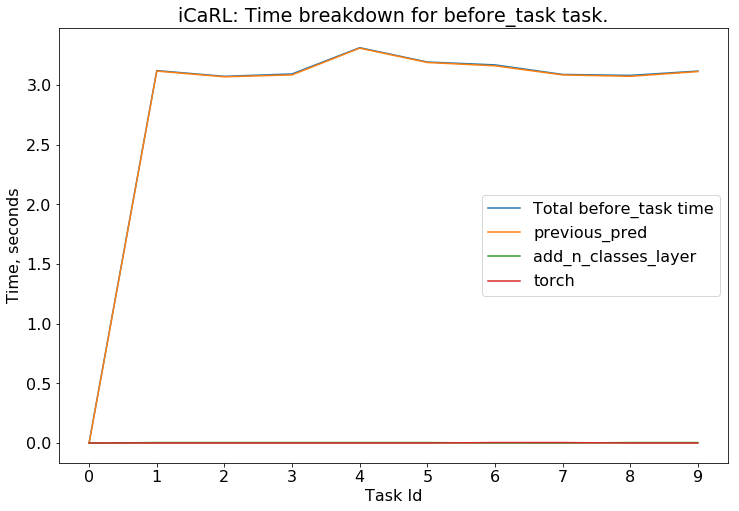

In [25]:
prof.plot_subprofile_breakdown(["before_task"])

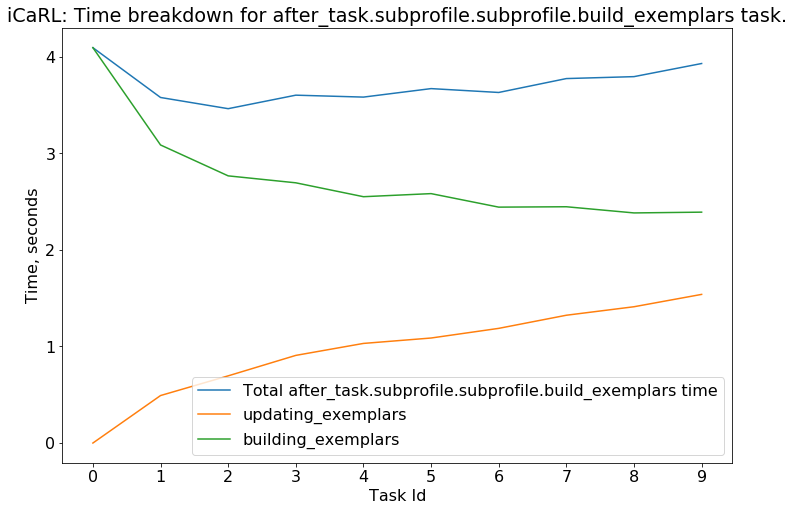

In [40]:
prof.plot_subprofile_breakdown(["after_task", "subprofile", "subprofile", "build_exemplars"])

Text(0.5,1,'iCaRL: Time Breakdown for building new exemplars ')

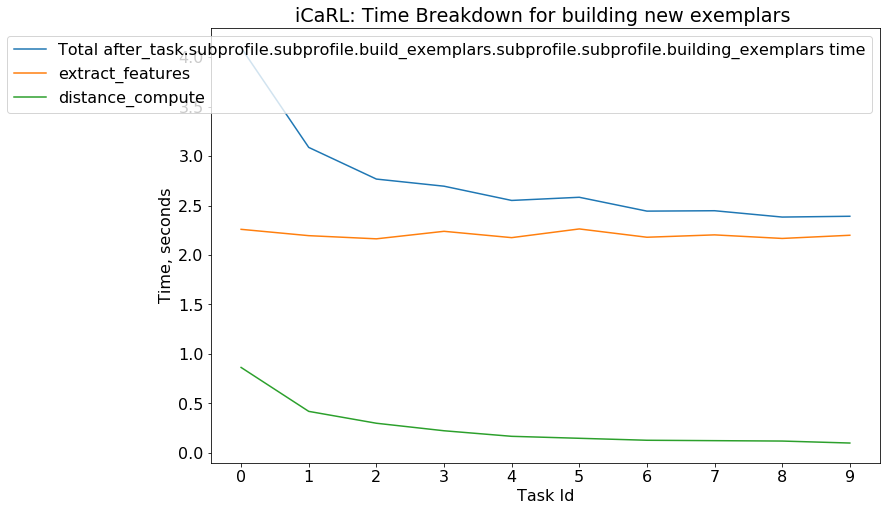

In [42]:
prof.plot_subprofile_breakdown(["after_task", "subprofile", "subprofile", "build_exemplars", "subprofile", "subprofile", "building_exemplars" ])
plt.title("iCaRL: Time Breakdown for building new exemplars ")

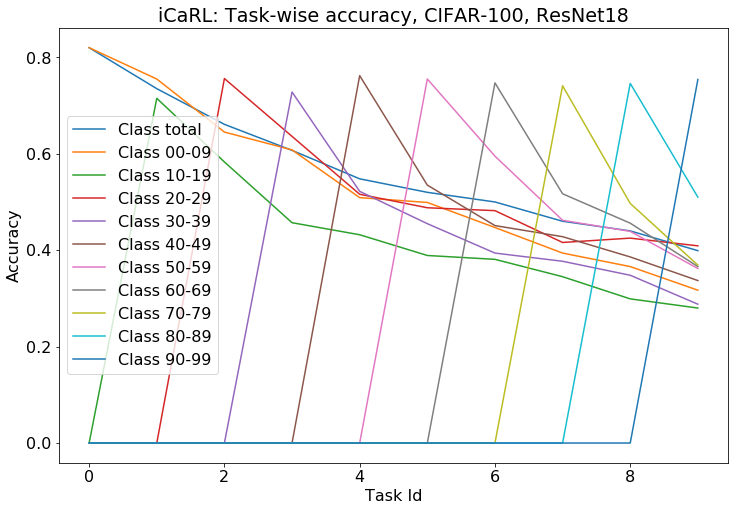

In [53]:
prof.plot_taskwise_accuracy()